In [1]:
import numpy as np
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt
import torch

In [2]:
housing_data = fetch_california_housing()
print(housing_data.data.shape)

(20640, 8)


The above Output shows that it is a dataset with 20640 training examples and 8 features

In [3]:
print(housing_data.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


The cell below converts all the features into a list format

In [4]:

features_list=housing_data.feature_names

If I want to view all the 20640 values corresponding to a particular feature in list format, I can use the below command

In [5]:
median_income_feature = housing_data.data[:,features_list.index(features_list[0])]
print(median_income_feature)

[8.3252 8.3014 7.2574 ... 1.7    1.8672 2.3886]


Next, I will create the input array by stacking all the training examples(20640) along with the 8 input features. The input array size will be (8,20640) in this case. The function set_input does this task

In [7]:
input_arr=np.zeros((8,20640))

In [8]:
def set_input(features_list,input_arr):
  x=input_arr.shape[0]
  y=input_arr.shape[1]
  for i in range(x):
    for j in range(y):
      input_arr[i][j]=housing_data.data[:,features_list.index(features_list[i])][j]
  return input_arr



In [9]:
input_arr=set_input(features_list,input_arr)

In [10]:
input_arr

array([[   8.3252    ,    8.3014    ,    7.2574    , ...,    1.7       ,
           1.8672    ,    2.3886    ],
       [  41.        ,   21.        ,   52.        , ...,   17.        ,
          18.        ,   16.        ],
       [   6.98412698,    6.23813708,    8.28813559, ...,    5.20554273,
           5.32951289,    5.25471698],
       ...,
       [   2.55555556,    2.10984183,    2.80225989, ...,    2.3256351 ,
           2.12320917,    2.61698113],
       [  37.88      ,   37.86      ,   37.85      , ...,   39.43      ,
          39.43      ,   39.37      ],
       [-122.23      , -122.22      , -122.24      , ..., -121.22      ,
        -121.32      , -121.24      ]])

**Question No (1)**: I have to create the complete Neural Network as suggested in the question, from Scratch. I have used NumPy library exclusively for this purpose. I have defined separate functions for Weights & Biases initialization, Forward Propagation, Backpropagation and later built Adam Optimizer and NAG optimization algorithm from scratch  

**In the following cells below, I have defined all the hidden layers by help of a dictionary**

The next cell is used to initialize the weights and biases according to the given Neural Network. I have also used a seed value of 42

In [11]:
layer_dict={'H0':8,'H1':128,'H2':64,'H3':32,'H4':1} #H0 denotes the no.of input features=8

def initialize_weights_biases(layer_dict):
  '''
  Initializing the Weights(4, 2-D arrays with all positive and small random values)
  '''
  seed_value = 42
  torch.manual_seed(seed_value)
  W1=(np.random.randn(layer_dict['H1'],layer_dict['H0'])*0.01)
  W2=(np.random.randn(layer_dict['H2'],layer_dict['H1'])*0.01)
  W3=(np.random.randn(layer_dict['H3'],layer_dict['H2'])*0.01)
  W4=(np.random.randn(layer_dict['H4'],layer_dict['H3'])*0.01)
  '''
  Initializing the Biases(4, 1-D arrays with all values initialized to 0)
  '''
  b1=np.zeros((layer_dict['H1'],1))
  b2=np.zeros((layer_dict['H2'],1))
  b3=np.zeros((layer_dict['H3'],1))
  b4=np.zeros((layer_dict['H4'],1))

  weights_dict={'W1':W1,'W2':W2,'W3':W3,'W4':W4}
  bias_dict={'b1':b1,'b2':b2,'b3':b3,'b4':b4}

  return weights_dict,bias_dict


In the cell below, I have created separate activation functions(**'ReLU'**(for hidden layers) and **'Linear'**(for output layer)) with the help of user defined functions.There needs to no changes made for Linear part

In [18]:
def relu_func(num):
  if(num>=0):
    return num
  else:
    return 0

def ReLU_func(arr):
  x=arr.shape[0]
  y=arr.shape[1]
  arr1=np.zeros((x,y))
  for i in range(x):
    for j in range(y):
      arr1[i][j]=arr[i][j]
  for i in range(x):
    for j in range(y):
      arr1[i][j]=relu_func(arr1[i][j])
  return arr1


In [19]:
def forward_pass(input_arr,weights_dict,bias_dict):
  Z_dict={}
  A_dict={}
  X=np.dot(weights_dict['W1'],input_arr)
  Z=X+bias_dict['b1']
  Z_dict['Z1']=Z
  A=ReLU_func(Z)
  A_dict['A1']=A
  for i in range(2,4):
    X=np.dot(weights_dict['W'+str(i)],A_dict['A'+str(i-1)])
    Z=X+bias_dict['b'+str(i)]
    Z_dict['Z'+str(i)]=Z
    A=ReLU_func(Z)
    A_dict['A'+str(i)]=A
  X=np.dot(weights_dict['W4'],A_dict['A3'])
  Z=X+bias_dict['b4']
  Z_dict['Z4']=Z
  A_dict['A4']=Z
  return Z_dict,A_dict


As the Loss is RMSE loss, I will use the ground truth labels(y) and the final output (y(hat)=A4) for calculation

In [20]:
ground_truth_labels=housing_data.target
ground_truth_labels.shape


(20640,)

Next, I will be matching the shapes of y(ground_truth_labels) and y_predicted by creating a 1-D array. I have defined a function "y_predicted" for this purpose

In [21]:
def y_predicted(input_arr):
  x=input_arr.shape[1]
  y_pred=[]
  for i in range(x):
    y_pred.append(input_arr[0][i])
  y_pred=np.array(y_pred)
  return y_pred

In the cell below, I have defined function for calculating RMSE loss

In [22]:
import math
def RMS_loss(ground_truth_labels,y_pred):
  x=len(ground_truth_labels)
  sum=0
  for i in range(x):
    sum=sum+math.pow((ground_truth_labels[i]-y_pred[i]),2)
  sum=sum/x

  return sum

In the next cell, I gave defined a function for slicing the input_array(8,20640) based on start index, end index. It would be beneficial for mini_batch gradient descent with given batch size(32) and also it would help splitting the dataset into training and validation sets(80:20)

In [23]:
def slice_array(arr,start_idx,end_idx):
  y=end_idx-start_idx
  x=arr.shape[0]
  sliced_arr=np.zeros((x,y))
  for i in range(x):
    for j in range(start_idx,end_idx):
      sliced_arr[i][j-start_idx]=arr[i][j]

  return sliced_arr


In [24]:
end_index=int((80/100)*20640)
training_input=slice_array(input_arr,0,end_index)
validation_input=slice_array(input_arr,end_index,input_arr.shape[1])
batch_size=32
n_epochs=100

In [25]:
print(training_input.shape)

(8, 16512)


In [26]:
print(validation_input.shape)

(8, 4128)


In [27]:
def slice_labels(labels_array,start_index,end_index):
  x=len(labels_array)
  sliced_labels=[]
  for i in range(start_index,end_index):
    sliced_labels.append(labels_array[i])
  return sliced_labels

In [28]:
end=int((80/100)*20640)
training_labels=slice_labels(ground_truth_labels,0,end)
validation_labels=slice_labels(ground_truth_labels,end,len(ground_truth_labels))

In [29]:
print(len(training_labels))

16512


Question No (2): Building Adam Optimizer from Scratch and defining other helper functions needed for the purpose

For using **Adam Optimizer** while performing **Backpropagation**, I need to calculate the terms **dA, dZ, dW, db** and use them while updating the Weights and Biases using the given learning rate of 0.0001

In the next few cells, I have made it ready for building Adam Optimizer from scratch and simultaneously performing backpropagation

In [31]:
'''
The 2 user defined functions below computes the derivative of ReLU for a single entry and then for a 2-D array
'''
def ReLU_derivative(num):
  if(num>0):
    return 1
  elif(num<0):
    return 0

def ReLU_derivative_in_array(arr):
  x=arr.shape[0]
  y=arr.shape[1]
  arr1=np.zeros((x,y))
  for i in range(x):
    for j in range(y):
      arr1[i][j]=arr[i][j]
  for i in range(x):
    for j in range(y):
      arr1[i][j]=ReLU_derivative(arr1[i][j])
  return arr1


Next, I have defined function for performing Backpropagation from Scratch.

In [33]:
def backpropagation_parameters(weights_dict,bias_dict,Z_dict,A_dict,ground_truth_labels,y_predicted,training_input):
  dA_dict={}
  dZ_dict={}
  dW_dict={}
  db_dict={}
  x=len(ground_truth_labels)
  sum=0
  for i in range(x):
    sum=sum+(ground_truth_labels[i]-y_predicted[i])
  sum=-(2*sum)
  sum=sum/x
  dA=sum
  dA_dict['dA4']=dA
  x=Z_dict['Z4'].shape[0]
  y=Z_dict['Z4'].shape[1]
  derivative_arr=np.ones((x,y))
  #for i in range(x):
    #for j in range(y):
      #derivative_arr[i][j]=(dA_dict['dA4']*derivative_arr[i][j])

  dZ=(dA_dict['dA4'])*derivative_arr
  dZ_dict['dZ4']=dZ
  dW=(1/x)*np.dot(dZ_dict['dZ4'],(A_dict['A3'].transpose()))
  dW_dict['dW4']=dW
  db=(1/x)*(np.sum(dZ_dict['dZ4'],axis=1,keepdims=True))
  db_dict['db4']=db
  for i in range(3,1,-1):
    dA=np.dot((weights_dict['W'+str(i+1)].transpose()),dZ_dict['dZ'+str(i+1)])
    dA_dict['dA'+str(i)]=dA
    dZ=(dA_dict['dA'+str(i)])*(ReLU_derivative_in_array(Z_dict['Z'+str(i)]))
    dZ_dict['dZ'+str(i)]=dZ
    dW=(1/x)*np.dot(dZ_dict['dZ'+str(i)],(A_dict['A'+str(i-1)].transpose()))
    dW_dict['dW'+str(i)]=dW
    db=(1/x)*(np.sum(dZ_dict['dZ'+str(i)],axis=1,keepdims=True))
    db_dict['db'+str(i)]=db
  dA=np.dot((weights_dict['W2'].transpose()),dZ_dict['dZ2'])
  dA_dict['dA1']=dA
  dZ=(dA_dict['dA1'])*(ReLU_derivative_in_array(Z_dict['Z1']))
  dZ_dict['dZ1']=dZ
  dW=(1/x)*np.dot(dZ_dict['dZ1'],training_input.transpose())
  dW_dict['dW1']=dW
  db=(1/x)*(np.sum(dZ_dict['dZ1'],axis=1,keepdims=True))
  db_dict['db1']=db

  return dA_dict,dZ_dict,dW_dict,db_dict



Building Adam Optimizer from Scratch

In [35]:
def Adam_optimizer(time_step,weights_dict,bias_dict,dW_dict,db_dict,m_dW_dict,v_dW_dict,m_db_dict,v_db_dict,learning_rate=0.0001,beta_1=0.9,beta_2=0.999,epsilon=1e-8):
  for i in range(1,5):
     #As the number of hidden units are 4
     m_dW_dict['m_dW'+str(i)]=((m_dW_dict['m_dW'+str(i)])*(beta_1))+((1-beta_1)*(dW_dict['dW'+str(i)]))
     v_dW_dict['v_dW'+str(i)]=((v_dW_dict['v_dW'+str(i)])*(beta_2))+((1-beta_2)*(np.square(dW_dict['dW'+str(i)])))
     m_db_dict['m_db'+str(i)]=((m_db_dict['m_db'+str(i)])*(beta_1))+((1-beta_1)*(db_dict['db'+str(i)]))
     v_db_dict['v_db'+str(i)]=((v_db_dict['v_db'+str(i)])*(beta_2))+((1-beta_2)*(np.square(db_dict['db'+str(i)])))
     m_dW_adjusted=m_dW_dict['m_dW'+str(i)]*(1/(1-math.pow(beta_1,time_step)))
     m_db_adjusted=m_db_dict['m_db'+str(i)]*(1/(1-math.pow(beta_1,time_step)))
     v_dW_adjusted=v_dW_dict['v_dW'+str(i)]*(1/(1-math.pow(beta_2,time_step)))
     v_db_adjusted=v_db_dict['v_db'+str(i)]*(1/(1-math.pow(beta_2,time_step)))
     '''
     In the next 2 lines, I have updated the weights and biases using Adam optimizer parameters derived in the above lines
     and the fixed learning rate
     '''
     weights_dict['W'+str(i)]=weights_dict['W'+str(i)]-((learning_rate)*(m_dW_adjusted/(np.sqrt(v_dW_adjusted)+epsilon)))
     bias_dict['b'+str(i)]=bias_dict['b'+str(i)]-((learning_rate)*(m_db_adjusted/(np.sqrt(v_db_adjusted)+epsilon)))

  time_step=time_step+1



In [36]:
weights_dict,bias_dict=initialize_weights_biases(layer_dict)
iters_per_epoch=int(((80/100)*20640)/batch_size)
training_loss=[]
validation_loss=[]
#print(iters_per_epoch)


In the next cell, I have initialized all the initial momentum and velocity values for Adam Optimizer to 0

In [37]:

m_dW_dict={}
v_dW_dict={}
m_db_dict={}
v_db_dict={}
for i in range(1,5):
  m_dW_dict['m_dW'+str(i)]=0
  v_dW_dict['v_dW'+str(i)]=0
  m_db_dict['m_db'+str(i)]=0
  v_db_dict['v_db'+str(i)]=0


**The next cell shows my Mini-batch gradient descent procedure using Adam Optimizer with a batch size of 32 and for 100 Epochs**. **I have used all the functions I defined earlier**

In [38]:
time_step=1
#start=0
#end=32
for i in range(n_epochs):
  start=0
  end=32
  while(end!=int((80/100)*20640)):
    training_mini_batch=slice_array(training_input,start,end)
    mini_ground_truth_labels=slice_labels(training_labels,start,end)
    Z_dict,A_dict=forward_pass(training_mini_batch,weights_dict,bias_dict)
    mini_y_predicted=y_predicted(A_dict['A4'])
    dA_dict,dZ_dict,dW_dict,db_dict=backpropagation_parameters(weights_dict,bias_dict,Z_dict,A_dict,mini_ground_truth_labels,mini_y_predicted,training_mini_batch)
    Adam_optimizer(time_step,weights_dict,bias_dict,dW_dict,db_dict,m_dW_dict,v_dW_dict,m_db_dict,v_db_dict)
    start=start+32
    end=end+32

  training_Z_dict,training_A_dict=forward_pass(training_input,weights_dict,bias_dict)
  training_loss.append(RMS_loss(training_labels,y_predicted(training_A_dict['A4'])))
  validation_Z_dict,validation_A_dict=forward_pass(validation_input,weights_dict,bias_dict)
  validation_loss.append(RMS_loss(validation_labels,y_predicted(validation_A_dict['A4'])))






In [39]:
print(training_loss)

[3.1008903927896867, 2.887546980768309, 2.7618355901089955, 2.656490896446288, 2.559099971673104, 2.46534619073992, 2.388658022613159, 2.2889448191384973, 2.197739381954181, 2.108173813085455, 2.0340466327008393, 1.9438238887219865, 1.8506064880544246, 1.770985353911853, 1.696275325333683, 1.6276289642256745, 1.5661131985393086, 1.511992619334339, 1.4654595421000485, 1.425761242441785, 1.3925789267425883, 1.3697573265885068, 1.344723642968493, 1.3267379320052377, 1.3122865313983159, 1.3005503491242107, 1.2910767553946576, 1.283372012692481, 1.27710080704634, 1.2754832464808026, 1.2672181500185953, 1.2632319058070842, 1.2596384878582847, 1.2565096741200525, 1.2545472945044598, 1.2517327113693697, 1.2492304266747611, 1.246943778793132, 1.2446167280404552, 1.2422991830435428, 1.2399799207477706, 1.2376973874954158, 1.2353636227055207, 1.2329301860119584, 1.230551608450176, 1.2280843798387113, 1.2258231575710454, 1.225069484696289, 1.22133725028954, 1.2192048211169115, 1.2170872203255059, 

In [40]:
print(validation_loss)

[2.9669890924274585, 2.8300682665683072, 2.7321901234075208, 2.642993167896923, 2.5577503253045455, 2.474037948374199, 2.3945583141730786, 2.3108117752706083, 2.2287544141575593, 2.147485446016455, 2.066744333123216, 1.9884980091841324, 1.9107255738173823, 1.8375274155093813, 1.7686339752643043, 1.7050288215001073, 1.6477767719906284, 1.5974714706307145, 1.554143704229883, 1.5175451126731758, 1.4871566371810179, 1.4604449864936115, 1.441323183031171, 1.4255257437451185, 1.4127090542613834, 1.4024165762707712, 1.3939211652250418, 1.3869736428636406, 1.3812288593537836, 1.374853607384736, 1.3721525363901617, 1.3682807737633147, 1.3648342632803163, 1.3616509340402863, 1.3584481788919323, 1.3556640437502039, 1.3529974546890668, 1.350234545093271, 1.3474522129038342, 1.3446736173398541, 1.3417907324143274, 1.3388352901472396, 1.335879977495919, 1.3328167188370237, 1.3296708600343181, 1.3264493012603948, 1.3231805563774777, 1.319235034258131, 1.3163706510479871, 1.3130177325959693, 1.3095126

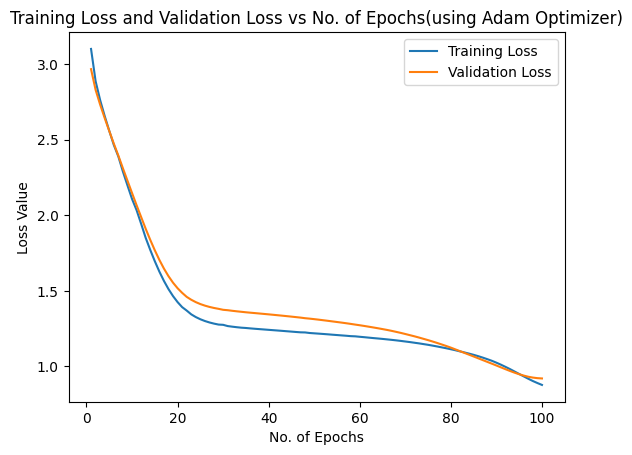

In [42]:
Epochs_list=[]
for i in range(1,101):
  Epochs_list.append(i)
plt.plot(Epochs_list, training_loss, label='Training Loss')
plt.plot(Epochs_list, validation_loss, label='Validation Loss')
plt.xlabel('No. of Epochs')
plt.ylabel('Loss Value')
plt.title('Training Loss and Validation Loss vs No. of Epochs(using Adam Optimizer)')
plt.legend()
plt.show()






Question No (3):Parts(a) and (b)

Next, I will repeat the full procedure above of building the Neural Network from scratch and then performing Backpropagation and parameters using **NAG(Nesterov Accelerated Gradient)** algorithm. So, I will use the same code above upto before the Adam Optimizer part and then separately define a function to implement **NAG**

In [43]:
def NAG_algo(weights_dict,bias_dict,dW_dict,db_dict,momentum_dict_weights,momentum_dict_bias,beta=0.99,learning_rate=0.0001):
  for i in range(1,5):

    momentum_dict_weights['v'+str(i)]=beta*(momentum_dict_weights['v'+str(i)])+((learning_rate)*(dW_dict['dW'+str(i)]))
    weights_dict['W'+str(i)]=weights_dict['W'+str(i)]-momentum_dict_weights['v'+str(i)]

    momentum_dict_bias['v'+str(i)]=beta*(momentum_dict_bias['v'+str(i)])+((learning_rate)*(db_dict['db'+str(i)]))
    bias_dict['b'+str(i)]=bias_dict['b'+str(i)]-momentum_dict_bias['v'+str(i)]




In [44]:
momentum_dict_weights={}
momentum_dict_bias={}
for i in range(1,5):
  momentum_dict_weights['v'+str(i)]=0
  momentum_dict_bias['v'+str(i)]=0


In [45]:
weights_dict_NAG,bias_dict_NAG=initialize_weights_biases(layer_dict)
iters_per_epoch=int(((80/100)*20640)/batch_size)
training_loss_using_NAG=[]
validation_loss_using_NAG=[]


**The next cell shows my Mini-batch gradient descent procedure using NAG Optimization Algorithm with a batch size of 32 and for 100 Epochs. I have used all the functions I defined earlier**

In [46]:
for i in range(n_epochs):
  start=0
  end=32
  while(end!=int((80/100)*20640)):
    training_mini_batch_NAG=slice_array(training_input,start,end)
    mini_ground_truth_labels_NAG=slice_labels(training_labels,start,end)
    Z_dict_NAG,A_dict_NAG=forward_pass(training_mini_batch_NAG,weights_dict_NAG,bias_dict_NAG)
    mini_y_predicted_NAG=y_predicted(A_dict_NAG['A4'])
    dA_dict_NAG,dZ_dict_NAG,dW_dict_NAG,db_dict_NAG=backpropagation_parameters(weights_dict_NAG,bias_dict_NAG,Z_dict_NAG,A_dict_NAG,mini_ground_truth_labels_NAG,mini_y_predicted_NAG,training_mini_batch_NAG)
    NAG_algo(weights_dict_NAG,bias_dict_NAG,dW_dict_NAG,db_dict_NAG,momentum_dict_weights,momentum_dict_bias)
    start=start+32
    end=end+32

  training_Z_dict_NAG,training_A_dict_NAG=forward_pass(training_input,weights_dict_NAG,bias_dict_NAG)
  training_loss_using_NAG.append(RMS_loss(training_labels,y_predicted(training_A_dict_NAG['A4'])))
  validation_Z_dict_NAG,validation_A_dict_NAG=forward_pass(validation_input,weights_dict_NAG,bias_dict_NAG)
  validation_loss_using_NAG.append(RMS_loss(validation_labels,y_predicted(validation_A_dict_NAG['A4'])))

In [47]:
print(training_loss_using_NAG)

[5.21202305471967, 5.183293404381861, 5.199806111296908, 5.197672823098995, 5.197875704052379, 5.197859578223479, 5.197860671542206, 5.197860610811515, 5.19786061306843, 5.197860613098137, 5.1978606130813025, 5.1978606130834555, 5.197860613083215, 5.197860613083244, 5.197860613083241, 5.197860613083246, 5.197860613083243, 5.197860613083241, 5.197860613083246, 5.197860613083243, 5.197860613083241, 5.197860613083246, 5.197860613083243, 5.197860613083241, 5.197860613083246, 5.197860613083243, 5.197860613083241, 5.197860613083246, 5.197860613083243, 5.197860613083241, 5.197860613083246, 5.197860613083243, 5.197860613083241, 5.197860613083246, 5.197860613083243, 5.197860613083241, 5.197860613083246, 5.197860613083243, 5.197860613083241, 5.197860613083246, 5.197860613083243, 5.197860613083241, 5.197860613083246, 5.197860613083243, 5.197860613083241, 5.197860613083246, 5.197860613083243, 5.197860613083241, 5.197860613083246, 5.197860613083243, 5.197860613083241, 5.197860613083246, 5.197860613

In [48]:
print(validation_loss_using_NAG)

[4.48929560933406, 4.464045283669973, 4.478556645422967, 4.476681674447714, 4.476859985765513, 4.476845812811008, 4.476846773726223, 4.476846720350176, 4.476846722333805, 4.476846722359898, 4.476846722345072, 4.476846722346974, 4.476846722346786, 4.476846722346814, 4.47684672234681, 4.476846722346816, 4.476846722346813, 4.47684672234681, 4.476846722346816, 4.476846722346813, 4.47684672234681, 4.476846722346816, 4.476846722346813, 4.47684672234681, 4.476846722346816, 4.476846722346813, 4.47684672234681, 4.476846722346816, 4.476846722346813, 4.47684672234681, 4.476846722346816, 4.476846722346813, 4.47684672234681, 4.476846722346816, 4.476846722346813, 4.47684672234681, 4.476846722346816, 4.476846722346813, 4.47684672234681, 4.476846722346816, 4.476846722346813, 4.47684672234681, 4.476846722346816, 4.476846722346813, 4.47684672234681, 4.476846722346816, 4.476846722346813, 4.47684672234681, 4.476846722346816, 4.476846722346813, 4.47684672234681, 4.476846722346816, 4.476846722346813, 4.4768

If I change the value of the hyperparameter beta(momentum), the Training and Validation losses would change. Here, I have used beta(momentum)=0.99

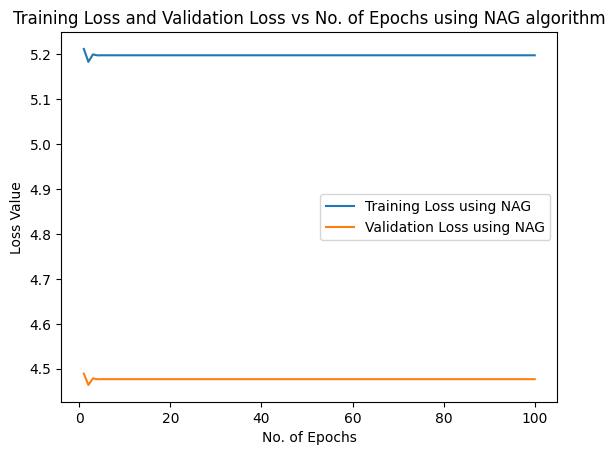

In [49]:
Epochs_list_NAG=[]
for i in range(1,101):
  Epochs_list_NAG.append(i)
plt.plot(Epochs_list_NAG, training_loss_using_NAG, label='Training Loss using NAG')
plt.plot(Epochs_list_NAG, validation_loss_using_NAG, label='Validation Loss using NAG')
plt.xlabel('No. of Epochs')
plt.ylabel('Loss Value')
plt.title('Training Loss and Validation Loss vs No. of Epochs using NAG algorithm')
plt.legend()
plt.show()


Question No:4

Next, I will be re-building the complete Neural Network using Pytorch. After which, I will apply the different optimizers namely, **Adam, NAG, Adagrad, Adamax, Adadelta, Vanilla** optimizers using **torch.optim** as mentioned in the question.

**CELL 1:**

In [79]:
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

**CELL 2:**

In [80]:
class Neural_Network(nn.Module):
    def __init__(self):
        super(Neural_Network, self).__init__()
        self.fc1 = nn.Linear(8, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

**CELL 3:**

In [81]:
california_housing_data = fetch_california_housing()
X_train, X_val, y_train, y_val = train_test_split(california_housing_data.data, california_housing_data.target, test_size=0.2, random_state=42) #Here random_state denotes the seed value
#test_size=0.2 means that the validation set is 20% and training set is 80%
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32).view(-1, 1)
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=len(val_dataset), shuffle=False)





**CELL 4:**

In [82]:
def train(my_model, optimizer, criterion, train_loader, val_loader, num_epochs):
    train_losses = []
    val_losses = []

    for epoch in range(num_epochs):
        my_model.train()
        total_train_loss = 0.0
        for inputs, targets in train_loader:
            optimizer.zero_grad()
            outputs = my_model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            total_train_loss += loss.item()

        average_train_loss = total_train_loss / len(train_loader)
        train_losses.append(average_train_loss)

        my_model.eval()
        total_val_loss = 0.0
        with torch.no_grad():
            for inputs, targets in val_loader:
                outputs = my_model(inputs)
                loss = criterion(outputs, targets)
                total_val_loss += loss.item()

        average_val_loss = total_val_loss / len(val_loader)
        val_losses.append(average_val_loss)

        print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {average_train_loss:.4f}, Val Loss: {average_val_loss:.4f}')

    return train_losses, val_losses

In [54]:
my_model = Neural_Network()
criterion = nn.MSELoss() # for MSE loss
num_epochs = 100
Adam_loss=[]
NAG_loss=[]
Adagrad_loss=[]
Adamax_loss=[]
Adadelta_loss=[]
Vanilla_loss=[]



**Note: For again resetting the various parameters to their initial values(and not the final trained values obtained after exercising a particular Optimizer), we will have to re-run some of the cells above separately before each optimizer.** **:**
**CELL 1, CELL 2, CELL 3, CELL 4**. I have also mentioned these cell numbers before each of the corresponding cells




(A): Using Adam Optimizer

In [55]:
#adam_optimizer = optim.Adam(my_model.parameters())
adam_optimizer = optim.Adam(my_model.parameters(), lr=0.0001, betas=(0.9, 0.999),eps=1e-8)
adam_train, adam_val = train(my_model, adam_optimizer, criterion, train_loader, val_loader, num_epochs)
Adam_loss.extend([adam_train, adam_val])

Epoch 1/100, Train Loss: 2.4375, Val Loss: 0.9239
Epoch 2/100, Train Loss: 0.7923, Val Loss: 0.6658
Epoch 3/100, Train Loss: 0.5987, Val Loss: 0.5539
Epoch 4/100, Train Loss: 0.5031, Val Loss: 0.4939
Epoch 5/100, Train Loss: 0.4585, Val Loss: 0.4655
Epoch 6/100, Train Loss: 0.4351, Val Loss: 0.4435
Epoch 7/100, Train Loss: 0.4204, Val Loss: 0.4282
Epoch 8/100, Train Loss: 0.4078, Val Loss: 0.4129
Epoch 9/100, Train Loss: 0.3972, Val Loss: 0.4022
Epoch 10/100, Train Loss: 0.3874, Val Loss: 0.3946
Epoch 11/100, Train Loss: 0.3797, Val Loss: 0.3846
Epoch 12/100, Train Loss: 0.3723, Val Loss: 0.3789
Epoch 13/100, Train Loss: 0.3657, Val Loss: 0.3782
Epoch 14/100, Train Loss: 0.3604, Val Loss: 0.3662
Epoch 15/100, Train Loss: 0.3553, Val Loss: 0.3635
Epoch 16/100, Train Loss: 0.3518, Val Loss: 0.3589
Epoch 17/100, Train Loss: 0.3466, Val Loss: 0.3543
Epoch 18/100, Train Loss: 0.3425, Val Loss: 0.3536
Epoch 19/100, Train Loss: 0.3386, Val Loss: 0.3478
Epoch 20/100, Train Loss: 0.3353, Val Lo

(B) Using Nesterov Accelerated Gradient (NAG) optimizer

In [63]:
NAG_optimizer = optim.SGD(my_model.parameters(), lr=0.0001, momentum=0.99, nesterov=True)
NAG_train, NAG_val = train(my_model, NAG_optimizer, criterion, train_loader, val_loader, num_epochs)
NAG_loss.extend([NAG_train, NAG_val])

Epoch 1/100, Train Loss: 0.2767, Val Loss: 0.3248
Epoch 2/100, Train Loss: 0.3977, Val Loss: 0.3356
Epoch 3/100, Train Loss: 0.2978, Val Loss: 0.2967
Epoch 4/100, Train Loss: 0.2793, Val Loss: 0.2972
Epoch 5/100, Train Loss: 0.2759, Val Loss: 0.3278
Epoch 6/100, Train Loss: 0.2770, Val Loss: 0.2842
Epoch 7/100, Train Loss: 0.2646, Val Loss: 0.2791
Epoch 8/100, Train Loss: 0.2646, Val Loss: 0.2870
Epoch 9/100, Train Loss: 0.2659, Val Loss: 0.2816
Epoch 10/100, Train Loss: 0.2642, Val Loss: 0.2799
Epoch 11/100, Train Loss: 0.2596, Val Loss: 0.2795
Epoch 12/100, Train Loss: 0.2606, Val Loss: 0.2842
Epoch 13/100, Train Loss: 0.2604, Val Loss: 0.2921
Epoch 14/100, Train Loss: 0.2589, Val Loss: 0.2801
Epoch 15/100, Train Loss: 0.2597, Val Loss: 0.2775
Epoch 16/100, Train Loss: 0.2597, Val Loss: 0.2779
Epoch 17/100, Train Loss: 0.2582, Val Loss: 0.2756
Epoch 18/100, Train Loss: 0.2573, Val Loss: 0.2812
Epoch 19/100, Train Loss: 0.2569, Val Loss: 0.2813
Epoch 20/100, Train Loss: 0.2550, Val Lo

In [68]:
adagrad_optimizer = optim.Adagrad(my_model.parameters(), lr=0.0001)
adagrad_train, adagrad_val = train(my_model, adagrad_optimizer, criterion, train_loader, val_loader, num_epochs)
Adagrad_loss.extend([adagrad_train, adagrad_val])


Epoch 1/100, Train Loss: 0.2084, Val Loss: 0.2550
Epoch 2/100, Train Loss: 0.2069, Val Loss: 0.2548
Epoch 3/100, Train Loss: 0.2065, Val Loss: 0.2547
Epoch 4/100, Train Loss: 0.2062, Val Loss: 0.2548
Epoch 5/100, Train Loss: 0.2060, Val Loss: 0.2547
Epoch 6/100, Train Loss: 0.2058, Val Loss: 0.2547
Epoch 7/100, Train Loss: 0.2057, Val Loss: 0.2548
Epoch 8/100, Train Loss: 0.2056, Val Loss: 0.2546
Epoch 9/100, Train Loss: 0.2055, Val Loss: 0.2547
Epoch 10/100, Train Loss: 0.2054, Val Loss: 0.2546
Epoch 11/100, Train Loss: 0.2053, Val Loss: 0.2545
Epoch 12/100, Train Loss: 0.2053, Val Loss: 0.2546
Epoch 13/100, Train Loss: 0.2052, Val Loss: 0.2546
Epoch 14/100, Train Loss: 0.2052, Val Loss: 0.2547
Epoch 15/100, Train Loss: 0.2051, Val Loss: 0.2546
Epoch 16/100, Train Loss: 0.2051, Val Loss: 0.2546
Epoch 17/100, Train Loss: 0.2051, Val Loss: 0.2546
Epoch 18/100, Train Loss: 0.2050, Val Loss: 0.2547
Epoch 19/100, Train Loss: 0.2050, Val Loss: 0.2546
Epoch 20/100, Train Loss: 0.2049, Val Lo

In [73]:
Adamax_optimizer = optim.Adamax(my_model.parameters(), lr=0.0001)
adamax_train, adamax_val = train(my_model, Adamax_optimizer, criterion, train_loader, val_loader, num_epochs)
Adamax_loss.extend([adamax_train, adamax_val])

Epoch 1/100, Train Loss: 0.2062, Val Loss: 0.2549
Epoch 2/100, Train Loss: 0.2057, Val Loss: 0.2561
Epoch 3/100, Train Loss: 0.2055, Val Loss: 0.2550
Epoch 4/100, Train Loss: 0.2053, Val Loss: 0.2574
Epoch 5/100, Train Loss: 0.2053, Val Loss: 0.2550
Epoch 6/100, Train Loss: 0.2051, Val Loss: 0.2560
Epoch 7/100, Train Loss: 0.2050, Val Loss: 0.2562
Epoch 8/100, Train Loss: 0.2050, Val Loss: 0.2553
Epoch 9/100, Train Loss: 0.2047, Val Loss: 0.2560
Epoch 10/100, Train Loss: 0.2045, Val Loss: 0.2563
Epoch 11/100, Train Loss: 0.2043, Val Loss: 0.2557
Epoch 12/100, Train Loss: 0.2042, Val Loss: 0.2575
Epoch 13/100, Train Loss: 0.2042, Val Loss: 0.2555
Epoch 14/100, Train Loss: 0.2043, Val Loss: 0.2553
Epoch 15/100, Train Loss: 0.2041, Val Loss: 0.2555
Epoch 16/100, Train Loss: 0.2043, Val Loss: 0.2561
Epoch 17/100, Train Loss: 0.2038, Val Loss: 0.2553
Epoch 18/100, Train Loss: 0.2039, Val Loss: 0.2569
Epoch 19/100, Train Loss: 0.2039, Val Loss: 0.2558
Epoch 20/100, Train Loss: 0.2036, Val Lo

In [78]:
Adadelta_optimizer = optim.Adadelta(my_model.parameters(), lr=0.0001)
adadelta_train, adadelta_val = train(my_model, Adadelta_optimizer, criterion, train_loader, val_loader, num_epochs)
Adadelta_loss.extend([adadelta_train, adadelta_val])

Epoch 1/100, Train Loss: 0.1969, Val Loss: 0.2556
Epoch 2/100, Train Loss: 0.1968, Val Loss: 0.2555
Epoch 3/100, Train Loss: 0.1967, Val Loss: 0.2555
Epoch 4/100, Train Loss: 0.1967, Val Loss: 0.2555
Epoch 5/100, Train Loss: 0.1967, Val Loss: 0.2555
Epoch 6/100, Train Loss: 0.1967, Val Loss: 0.2555
Epoch 7/100, Train Loss: 0.1966, Val Loss: 0.2555
Epoch 8/100, Train Loss: 0.1966, Val Loss: 0.2554
Epoch 9/100, Train Loss: 0.1966, Val Loss: 0.2555
Epoch 10/100, Train Loss: 0.1966, Val Loss: 0.2554
Epoch 11/100, Train Loss: 0.1966, Val Loss: 0.2554
Epoch 12/100, Train Loss: 0.1966, Val Loss: 0.2554
Epoch 13/100, Train Loss: 0.1966, Val Loss: 0.2554
Epoch 14/100, Train Loss: 0.1966, Val Loss: 0.2554
Epoch 15/100, Train Loss: 0.1966, Val Loss: 0.2554
Epoch 16/100, Train Loss: 0.1966, Val Loss: 0.2554
Epoch 17/100, Train Loss: 0.1966, Val Loss: 0.2554
Epoch 18/100, Train Loss: 0.1966, Val Loss: 0.2554
Epoch 19/100, Train Loss: 0.1966, Val Loss: 0.2554
Epoch 20/100, Train Loss: 0.1965, Val Lo

In [83]:
Vanilla_optimizer = optim.SGD(my_model.parameters(), lr=0.0001, momentum=0.9)
vanilla_train, vanilla_val = train(my_model, Vanilla_optimizer, criterion, train_loader, val_loader, num_epochs)
Vanilla_loss.extend([vanilla_train, vanilla_val])

Epoch 1/100, Train Loss: 0.2001, Val Loss: 0.2563
Epoch 2/100, Train Loss: 0.1997, Val Loss: 0.2595
Epoch 3/100, Train Loss: 0.1995, Val Loss: 0.2564
Epoch 4/100, Train Loss: 0.1996, Val Loss: 0.2585
Epoch 5/100, Train Loss: 0.1990, Val Loss: 0.2563
Epoch 6/100, Train Loss: 0.1991, Val Loss: 0.2563
Epoch 7/100, Train Loss: 0.1990, Val Loss: 0.2571
Epoch 8/100, Train Loss: 0.1992, Val Loss: 0.2580
Epoch 9/100, Train Loss: 0.1993, Val Loss: 0.2558
Epoch 10/100, Train Loss: 0.1991, Val Loss: 0.2566
Epoch 11/100, Train Loss: 0.1993, Val Loss: 0.2580
Epoch 12/100, Train Loss: 0.1990, Val Loss: 0.2559
Epoch 13/100, Train Loss: 0.1988, Val Loss: 0.2571
Epoch 14/100, Train Loss: 0.1987, Val Loss: 0.2578
Epoch 15/100, Train Loss: 0.1992, Val Loss: 0.2579
Epoch 16/100, Train Loss: 0.1990, Val Loss: 0.2566
Epoch 17/100, Train Loss: 0.1988, Val Loss: 0.2555
Epoch 18/100, Train Loss: 0.1989, Val Loss: 0.2557
Epoch 19/100, Train Loss: 0.1985, Val Loss: 0.2576
Epoch 20/100, Train Loss: 0.1985, Val Lo

Now I will plot 2 different sets of curves, one containing all the 6 training losses vs No. of Epochs and the other containing all the 6 Validation losses vs No. of Epochs

**(A) For Training Losses**

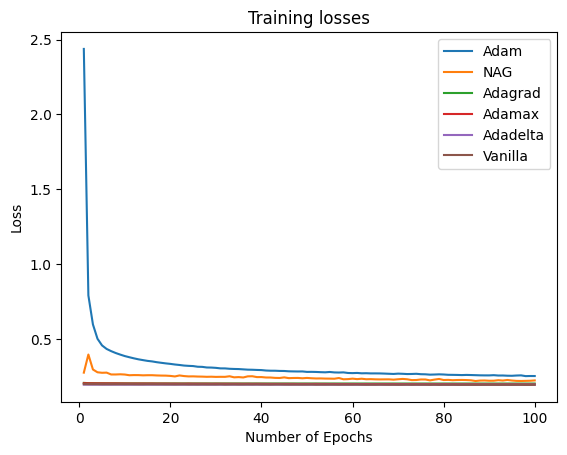

In [84]:
NUM_EPOCHS_LIST=[]
for i in range(1,101):
  NUM_EPOCHS_LIST.append(i)

plt.plot(NUM_EPOCHS_LIST,Adam_loss[0],label='Adam')
plt.plot(NUM_EPOCHS_LIST,NAG_loss[0],label='NAG')
plt.plot(NUM_EPOCHS_LIST,Adagrad_loss[0],label='Adagrad')
plt.plot(NUM_EPOCHS_LIST,Adamax_loss[0],label='Adamax')
plt.plot(NUM_EPOCHS_LIST,Adadelta_loss[0],label='Adadelta')
plt.plot(NUM_EPOCHS_LIST,Vanilla_loss[0],label='Vanilla')

plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.title('Training losses')
plt.legend()
plt.show()


**(B) For Validation Losses**

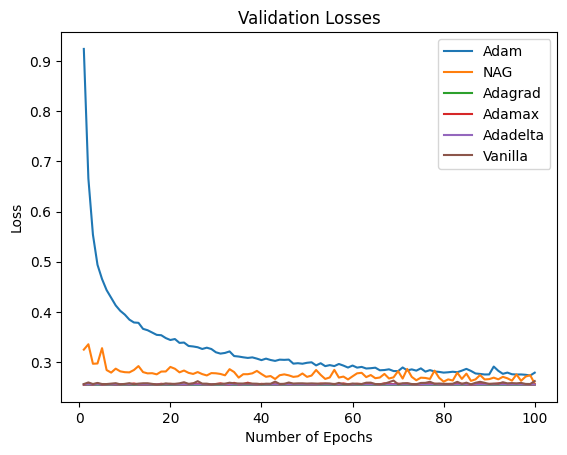

In [85]:
plt.plot(NUM_EPOCHS_LIST,Adam_loss[1],label='Adam')
plt.plot(NUM_EPOCHS_LIST,NAG_loss[1],label='NAG')
plt.plot(NUM_EPOCHS_LIST,Adagrad_loss[1],label='Adagrad')
plt.plot(NUM_EPOCHS_LIST,Adamax_loss[1],label='Adamax')
plt.plot(NUM_EPOCHS_LIST,Adadelta_loss[1],label='Adadelta')
plt.plot(NUM_EPOCHS_LIST,Vanilla_loss[1],label='Vanilla')

plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.title('Validation Losses')
plt.legend()
plt.show()

**Question No (5):** Synchronization of 2 curves can be measured by using correlation coefficient(np.corrcoef(curve1, curve2)[0, 1]): This measures the correlation value in between 0 and 1. Also I will plot the Loss vs Epochs plot of the 2 curves to compare them

**COMPARISON OF TRAINING CURVES BUILT USING SCRATCH AND BUILT USING torch.optim for Adam Optimizer.**

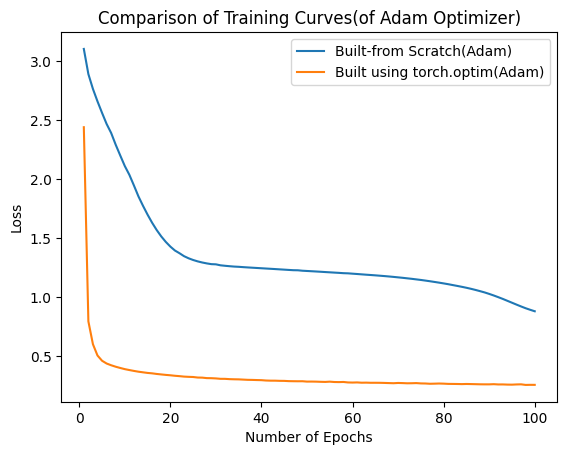

In [86]:
plt.plot(NUM_EPOCHS_LIST,training_loss,label='Built-from Scratch(Adam)')
plt.plot(NUM_EPOCHS_LIST,Adam_loss[0],label='Built using torch.optim(Adam)')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.title('Comparison of Training Curves(of Adam Optimizer)')
plt.legend()
plt.show()

In [87]:
correlation_coefficient_Adam_Training = np.corrcoef(training_loss, Adam_loss[0])[0, 1]
print(correlation_coefficient_Adam_Training)

0.6471053743181084


**COMPARISON OF VALIDATION CURVES BUILT USING SCRATCH AND BUILT USING torch.optim for Adam Optimizer.**

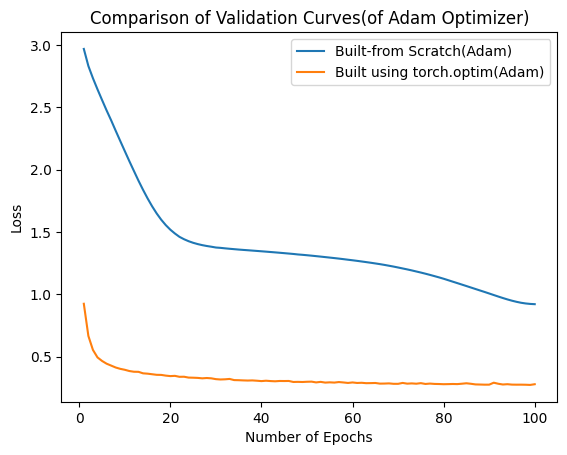

In [88]:
plt.plot(NUM_EPOCHS_LIST,validation_loss,label='Built-from Scratch(Adam)')
plt.plot(NUM_EPOCHS_LIST,Adam_loss[1],label='Built using torch.optim(Adam)')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.title('Comparison of Validation Curves(of Adam Optimizer)')
plt.legend()
plt.show()

In [89]:
correlation_coefficient_Adam_Validation = np.corrcoef(validation_loss, Adam_loss[1])[0, 1]
print(correlation_coefficient_Adam_Validation)

0.8760261838164765


**COMPARISON OF TRAINING CURVES BUILT USING SCRATCH AND BUILT USING torch.optim for NAG(Nesterov Accelerated Gradient) Optimization algorithm.**

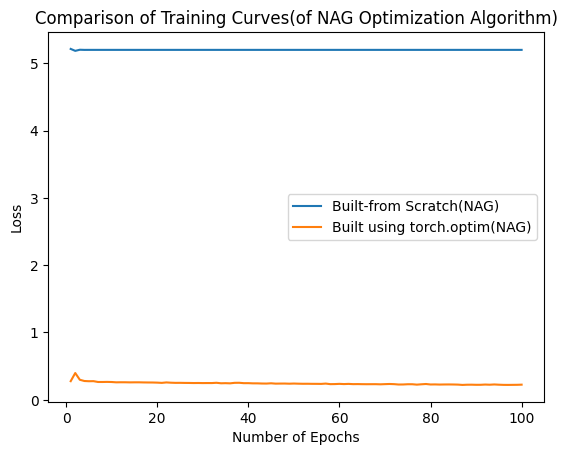

In [92]:
plt.plot(NUM_EPOCHS_LIST,training_loss_using_NAG,label='Built-from Scratch(NAG)')
plt.plot(NUM_EPOCHS_LIST,NAG_loss[0],label='Built using torch.optim(NAG)')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.title('Comparison of Training Curves(of NAG Optimization Algorithm)')
plt.legend()
plt.show()

In [93]:
correlation_coefficient_NAG_training = np.corrcoef(training_loss_using_NAG, NAG_loss[0])[0, 1]
print(correlation_coefficient_NAG_training)

-0.377835156975678


**COMPARISON OF VALIDATION CURVES BUILT USING SCRATCH AND BUILT USING torch.optim for NAG(Nesterov Accelerated Gradient) Optimization algorithm.**

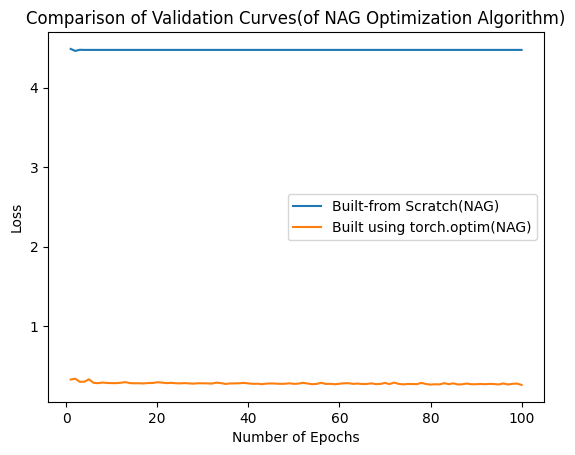

In [94]:
plt.plot(NUM_EPOCHS_LIST,validation_loss_using_NAG,label='Built-from Scratch(NAG)')
plt.plot(NUM_EPOCHS_LIST,NAG_loss[1],label='Built using torch.optim(NAG)')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.title('Comparison of Validation Curves(of NAG Optimization Algorithm)')
plt.legend()
plt.show()

In [95]:
correlation_coefficient_NAG_validation = np.corrcoef(validation_loss_using_NAG, NAG_loss[1])[0, 1]
print(correlation_coefficient_NAG_validation)

-0.05651077284995771
